Rainfall prediction through statistical methods.

School: NMIMS Navi Mumbai

Team:

1) Neeraj Pawar

2) Punya Arora

3) Bindi Gondalia

In [ ]:
import pandas as pd
import math
df=pd.read_csv("weatherAUS.csv")
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

# Split the "Date" column into date, time, and year columns
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Time"] = df["Date"].dt.time

# Drop the original "Date" column
df.drop("Date", axis=1, inplace=True)

# Print the first few rows of the modified dataset
print(df.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day      Time  
0     21.8    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [ ]:
"""
user_date = input("Enter month (as a number): ")
user_location = input("Enter location: ")
user_date = int(user_date)
year=2017

# Filter the DataFrame to get the row(s) that match the user inputs
filtered_df = df[(df['Month'] == user_date) & (df['Location'] == user_location) & (df['Year']!= year)]

# Check if there are any matching rows
if filtered_df.empty:
    print("No matching values found.")
else:
    # Extract the desired value (assuming it's in a column called 'RainToday')
    value = filtered_df.iloc[:]['RainToday']
    print(f"RainToday: {value}")

"""


Enter month (as a number): 12
Enter location: Albury
RainToday: 0        No
1        No
2        No
3        No
4        No
       ... 
2859    Yes
2860     No
2861    Yes
2862    Yes
2863    Yes
Name: RainToday, Length: 248, dtype: object


In [ ]:
def ask_func():
  ask_func.cities={(1, 'Albury'): (33, 215),
 (2, 'Albury'): (36, 162),
 (3, 'Albury'): (39, 209),
 (4, 'Albury'): (40, 170),
 (5, 'Albury'): (48, 200),
 (6, 'Albury'): (73, 167),
 (1, 'BadgerysCreek'): (63, 185),
 (2, 'BadgerysCreek'): (54, 144),
 (3, 'BadgerysCreek'): (65, 183),
 (4, 'BadgerysCreek'): (58, 152),
 (5, 'BadgerysCreek'): (43, 205),
 (6, 'BadgerysCreek'): (58, 182),
 (7, 'BadgerysCreek'): (36, 212),
 (8, 'BadgerysCreek'): (36, 212),
 (9, 'BadgerysCreek'): (37, 203),
 (10, 'BadgerysCreek'): (45, 203),
 (11, 'BadgerysCreek'): (64, 176),
 (12, 'BadgerysCreek'): (63, 154),
 (1, 'Cobar'): (31, 217),
 (2, 'Cobar'): (28, 170),
 (3, 'Cobar'): (34, 214),
 (4, 'Cobar'): (16, 194),
 (5, 'Cobar'): (37, 211),
 (6, 'Cobar'): (49, 191),
 (7, 'Cobar'): (32, 216),
 (8, 'Cobar'): (24, 224),
 (9, 'Cobar'): (34, 206),
 (10, 'Cobar'): (28, 220),
 (11, 'Cobar'): (42, 198),
 (12, 'Cobar'): (33, 184),
 (1, 'CoffsHarbour'): (105, 143),
 (2, 'CoffsHarbour'): (85, 113),
 (3, 'CoffsHarbour'): (104, 144),
 (4, 'CoffsHarbour'): (82, 128),
 (5, 'CoffsHarbour'): (71, 177),
 (6, 'CoffsHarbour'): (70, 170),
 (7, 'CoffsHarbour'): (48, 200),
 (8, 'CoffsHarbour'): (38, 210),
 (9, 'CoffsHarbour'): (46, 194),
 (10, 'CoffsHarbour'): (60, 188),
 (11, 'CoffsHarbour'): (72, 168),
 (12, 'CoffsHarbour'): (79, 138),
 (1, 'Moree'): (68, 180),
 (2, 'Moree'): (40, 158),
 (3, 'Moree'): (58, 190),
 (4, 'Moree'): (31, 179),
 (5, 'Moree'): (41, 207),
 (6, 'Moree'): (46, 194),
 (7, 'Moree'): (40, 208),
 (8, 'Moree'): (36, 212),
 (9, 'Moree'): (33, 207),
 (10, 'Moree'): (39, 209),
 (11, 'Moree'): (44, 196),
 (12, 'Moree'): (51, 166),
 (1, 'Newcastle'): (63, 185),
 (2, 'Newcastle'): (65, 133),
 (3, 'Newcastle'): (79, 169),
 (4, 'Newcastle'): (61, 149),
 (5, 'Newcastle'): (74, 174),
 (6, 'Newcastle'): (71, 169),
 (7, 'Newcastle'): (65, 183),
 (8, 'Newcastle'): (49, 199),
 (9, 'Newcastle'): (54, 186),
 (10, 'Newcastle'): (54, 194),
 (11, 'Newcastle'): (65, 175),
 (12, 'Newcastle'): (56, 192)}
  # Get user inputs for date and location

  user_date = input("Enter date Month: ")
  user_location = input("Enter location: ")
  user_date=int(user_date)
  year=2017

  # Filter the DataFrame to get the row(s) that match the user inputs
  filtered_df = df[(df['Month'] == user_date) & (df['Location'] == user_location) & (df['Year']!= year)]

  # Check if there are any matching rows
  if filtered_df.empty:
      print("No matching values found.")
  else:
      # Extract the desired value (assuming it's in a column called 'Value')
      value = filtered_df.iloc[:]['RainToday']
      print(f"The value for {user_location} on {user_date} is {value}.")
  no_count=0
  yes_count=0

  my_series = pd.Series(value)
  for i in my_series:
    if i=="No":
      no_count+=1
    else:
      yes_count+=1
  print("Number of yes: ",yes_count)
  print("Number of no: ", no_count)

ask_func()

Enter date Month: 12
Enter location: Albury
The value for Albury on 12 is 0        No
1        No
2        No
3        No
4        No
       ... 
2859    Yes
2860     No
2861    Yes
2862    Yes
2863    Yes
Name: RainToday, Length: 248, dtype: object.
Number of yes:  46
Number of no:  202


In [ ]:
city_ask=input("City: ")
month=[0,"January","February","March","April","May","June","July","August","September","October","November","December"]
rank=[]
for i in ask_func.cities:
  if i[1]==city_ask:
    percent=(ask_func.cities[i][0]/(ask_func.cities[i][0]+ask_func.cities[i][1]))*100
    percent=math.ceil(percent)
    print(month[i[0]],percent,"%")

City: Cobar
January 13 %
February 15 %
March 14 %
April 8 %
May 15 %
June 21 %
July 13 %
August 10 %
September 15 %
October 12 %
November 18 %
December 16 %


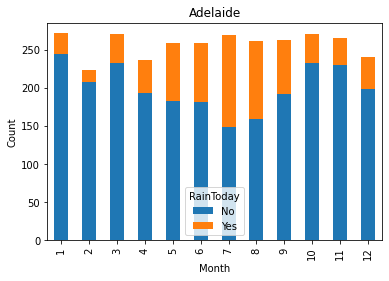

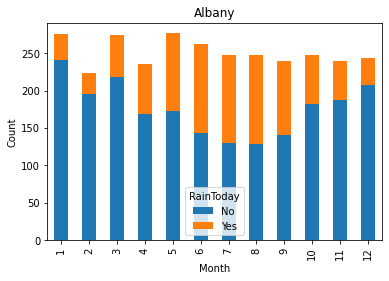

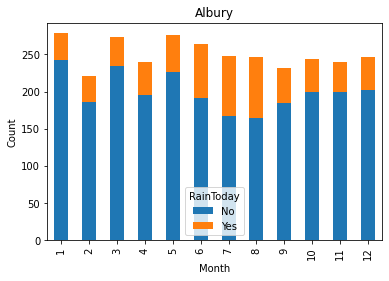

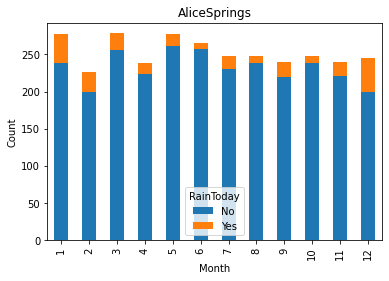

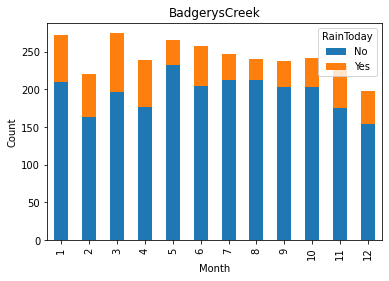

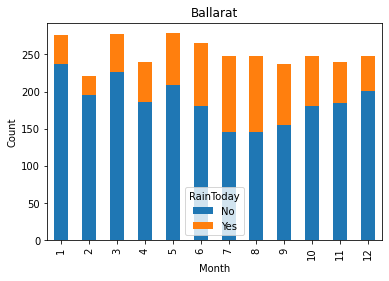

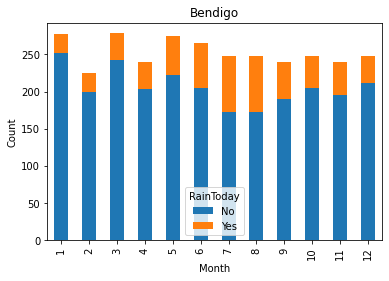

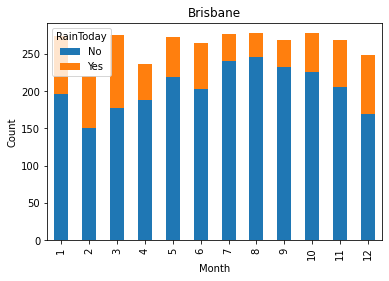

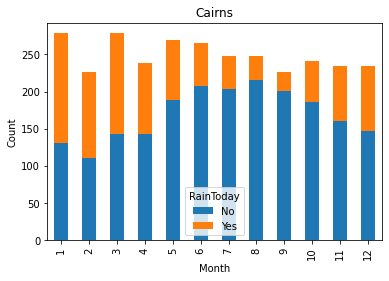

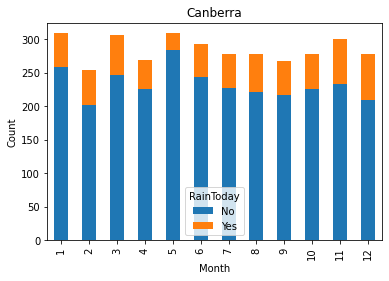

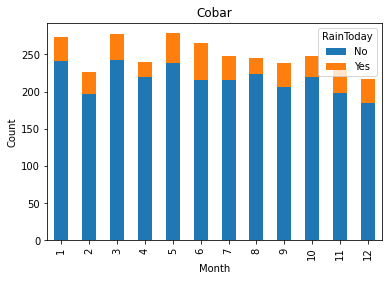

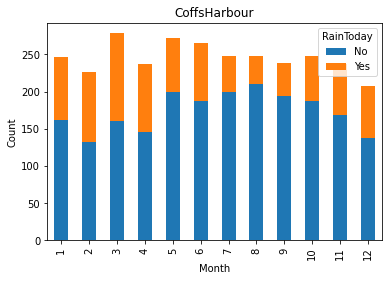

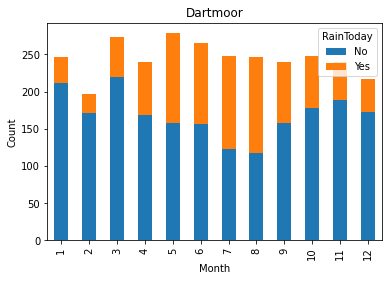

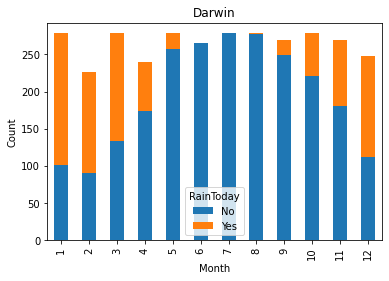

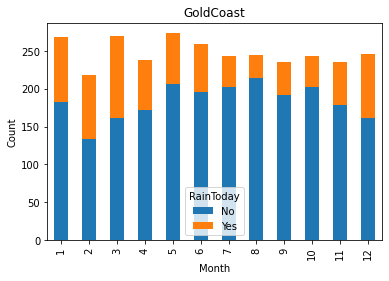

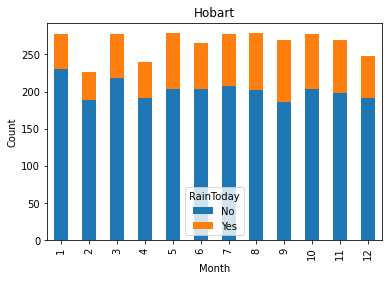

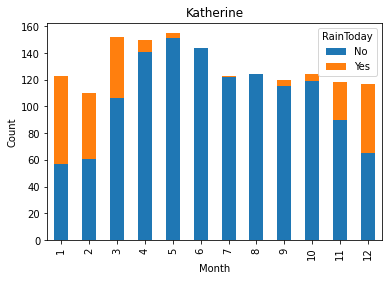

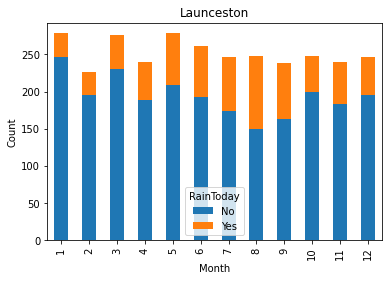

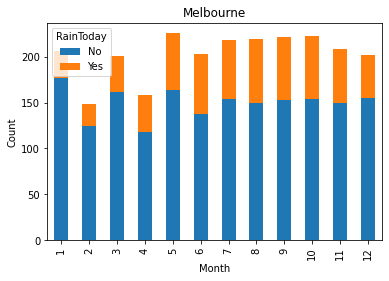

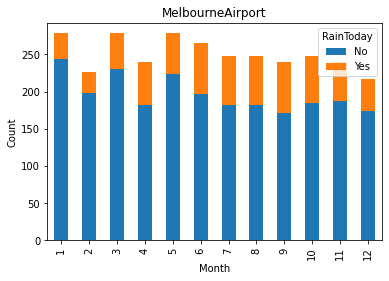

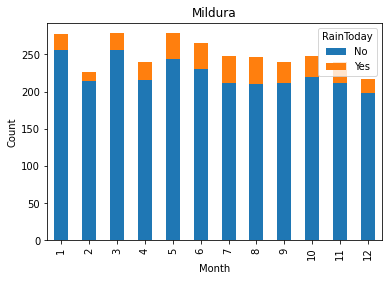

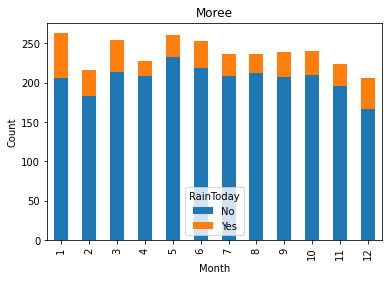

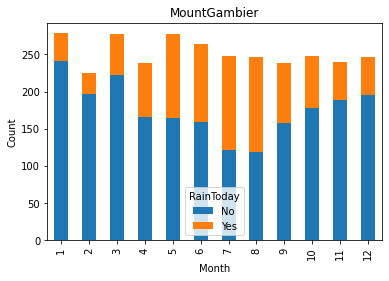

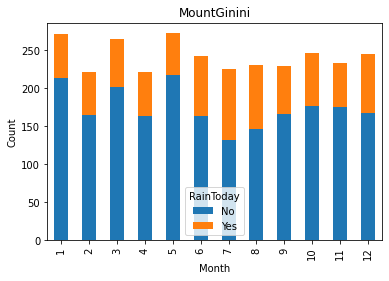

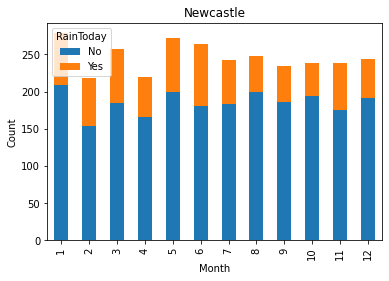

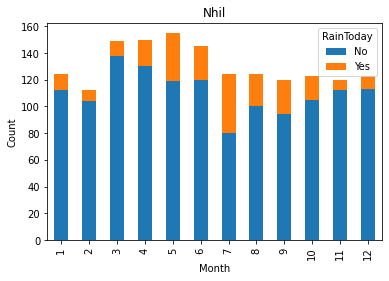

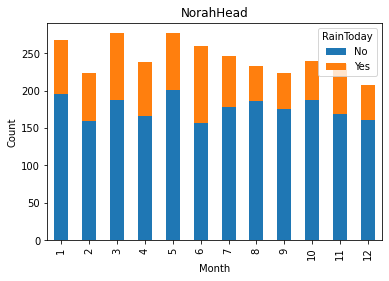

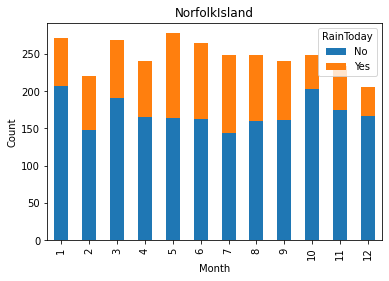

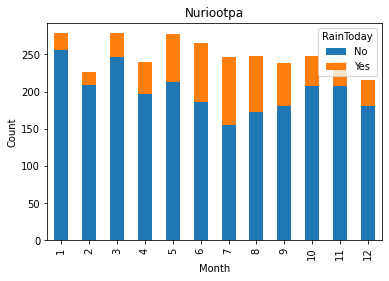

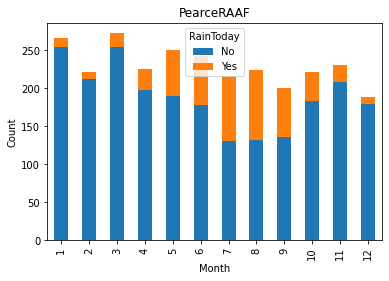

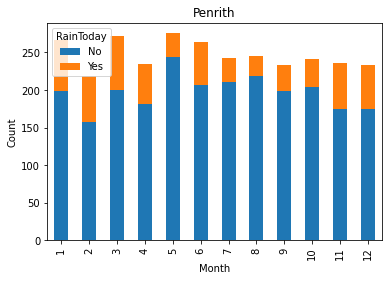

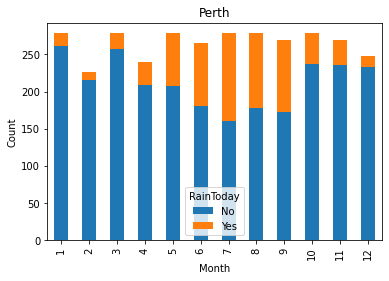

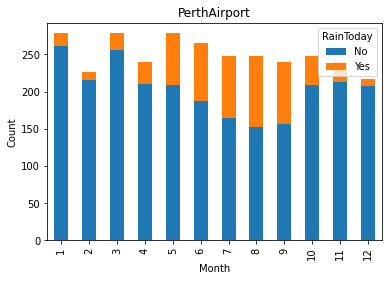

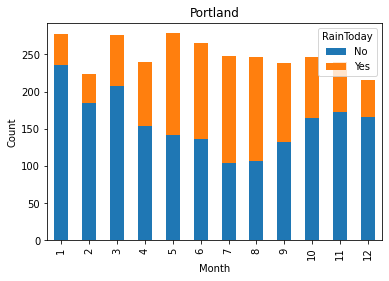

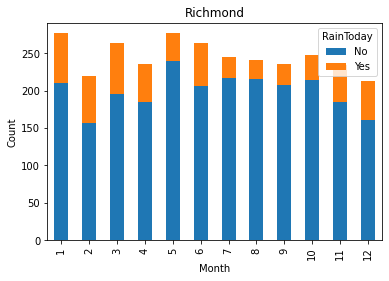

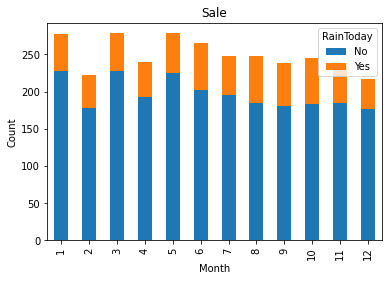

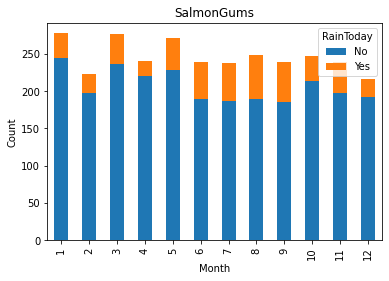

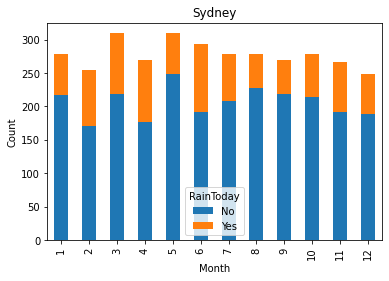

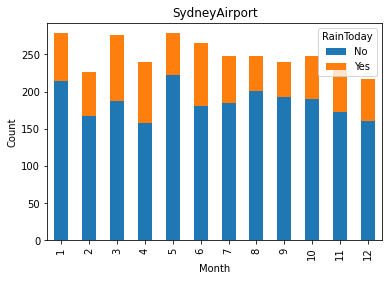

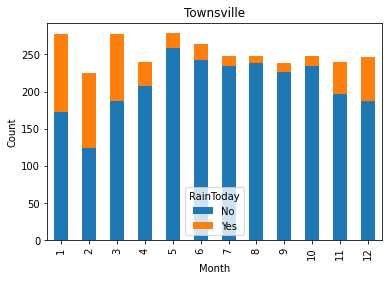

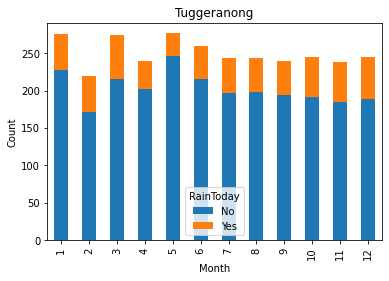

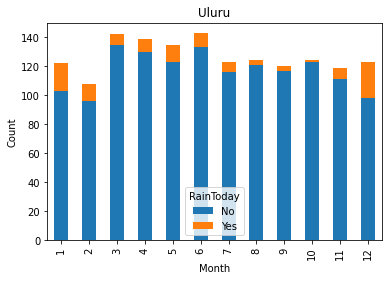

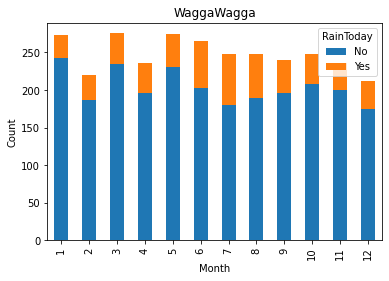

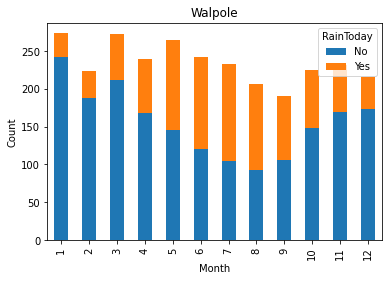

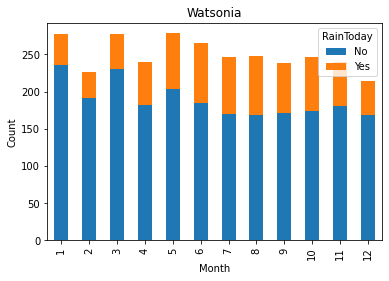

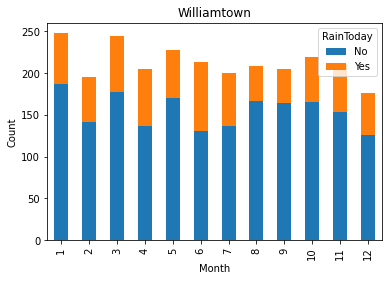

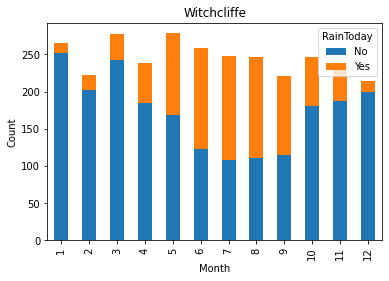

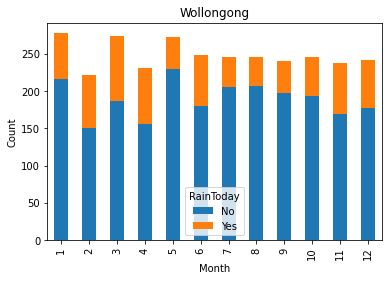

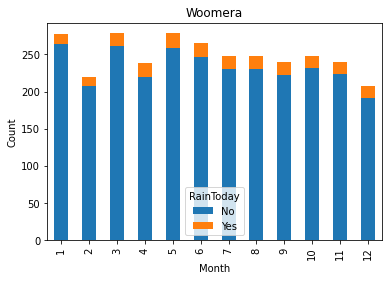

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=df
# Read the dataset into a Pandas dataframe

# Group the data by city
grouped_data = data.groupby('Location')

# Loop over each city and plot the graph
for name, group in grouped_data:
    # Group the data by month and RainToday, and count the number of occurrences
    grouped_month = group.groupby(['Month', 'RainToday'])['RainToday'].count().unstack()
    
    # Plot the graph
    ax = grouped_month.plot(kind='bar', stacked=True, title=name)
    ax.set_xlabel("Month")
    ax.set_ylabel("Count")
    plt.show()

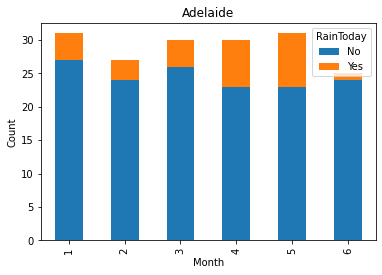

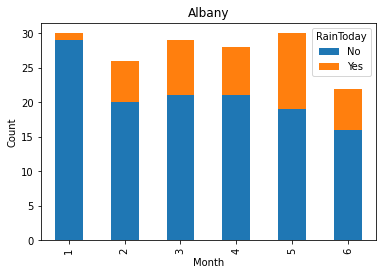

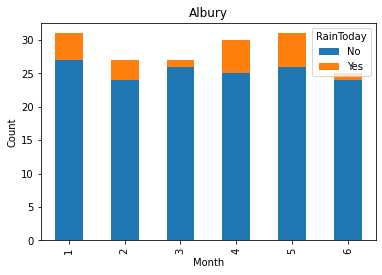

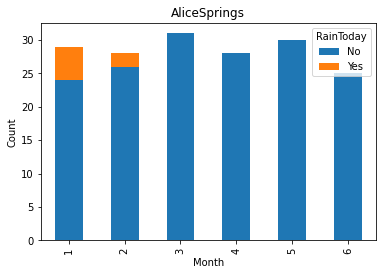

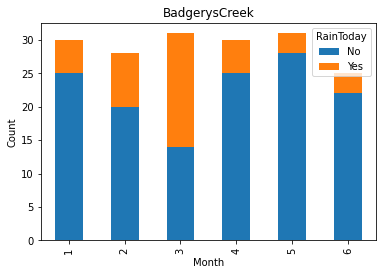

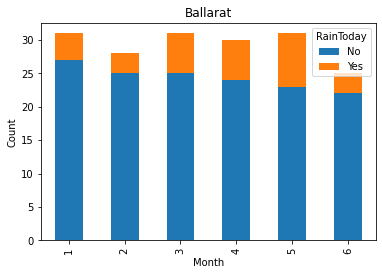

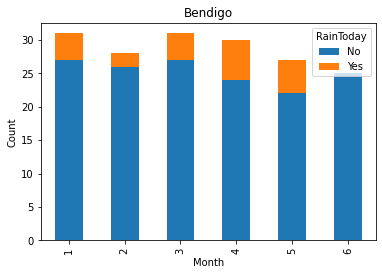

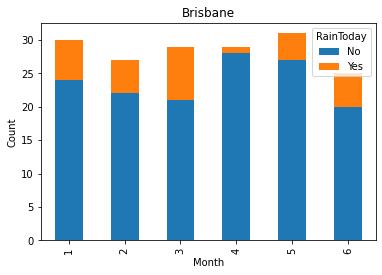

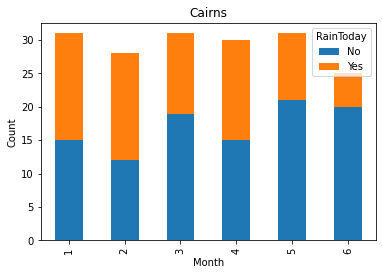

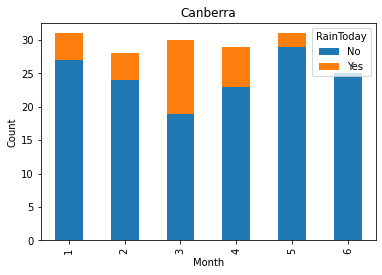

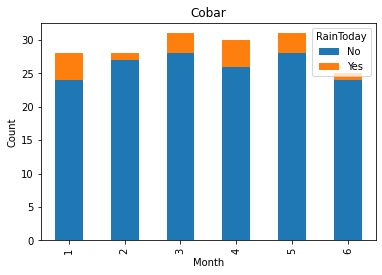

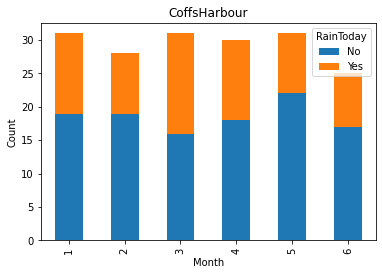

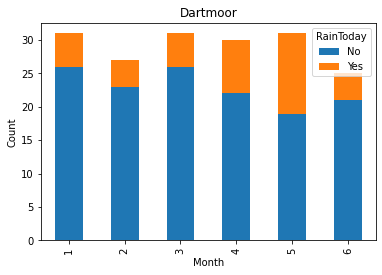

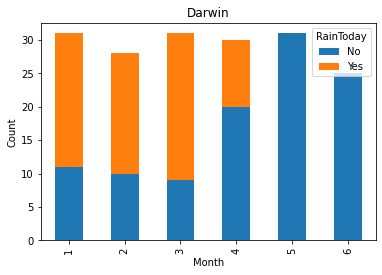

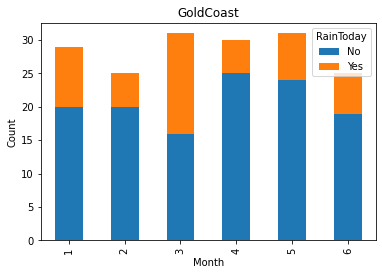

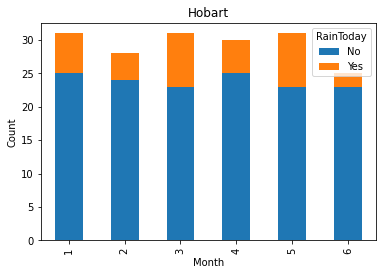

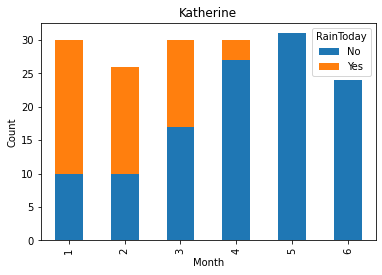

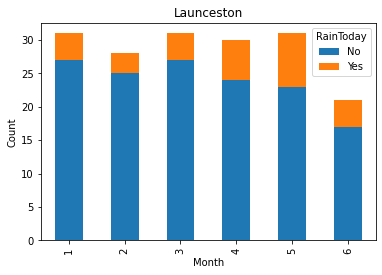

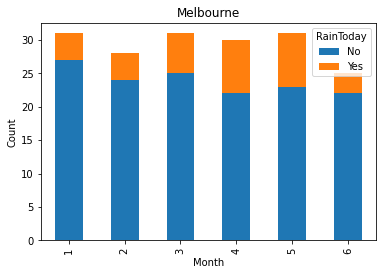

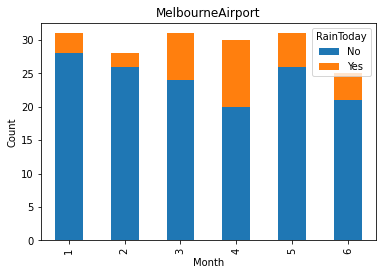

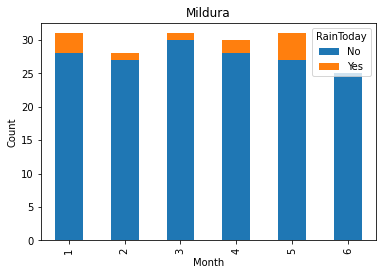

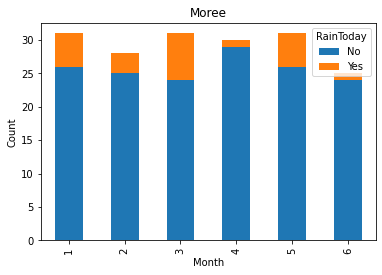

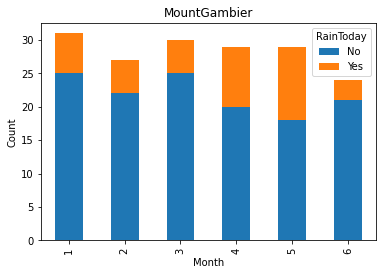

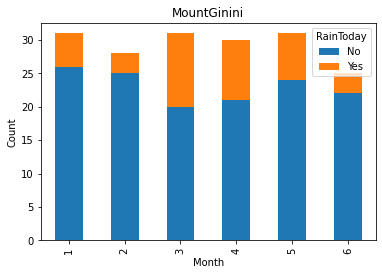

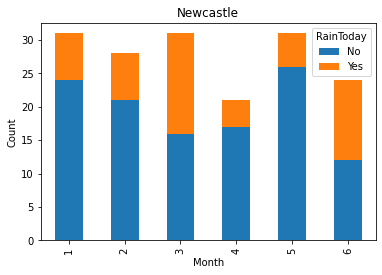

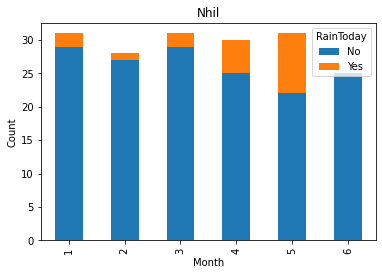

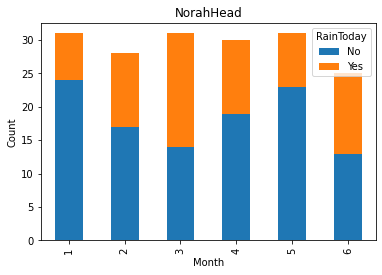

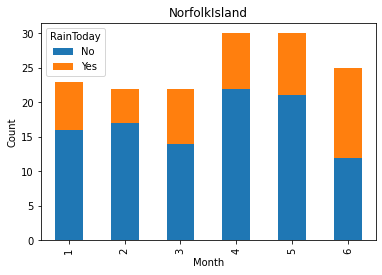

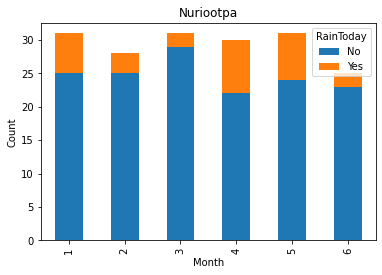

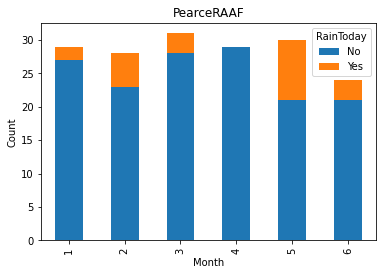

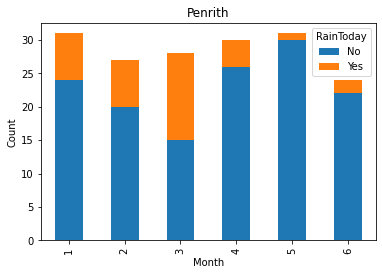

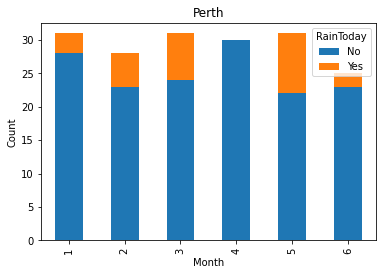

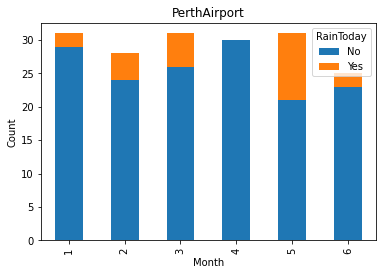

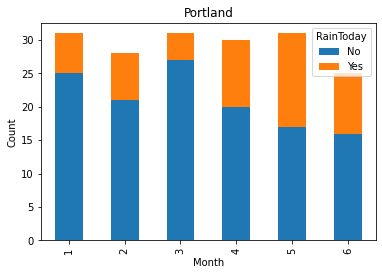

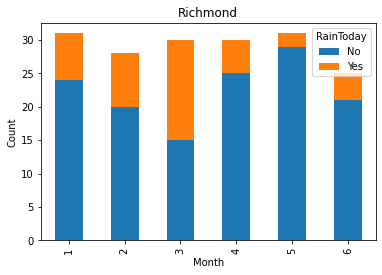

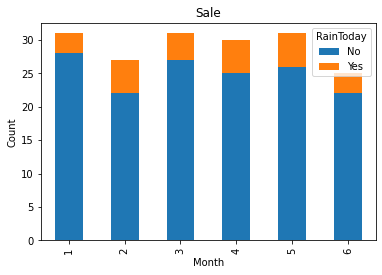

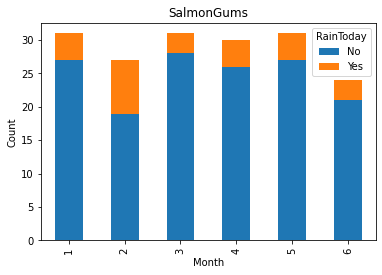

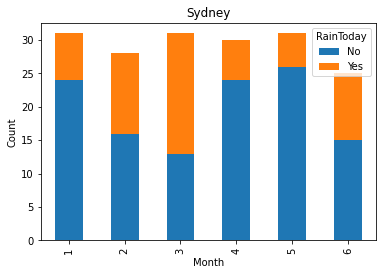

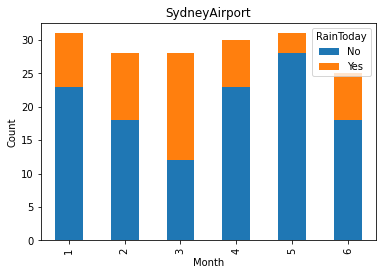

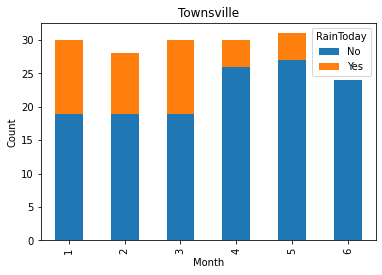

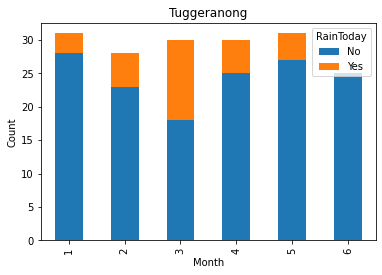

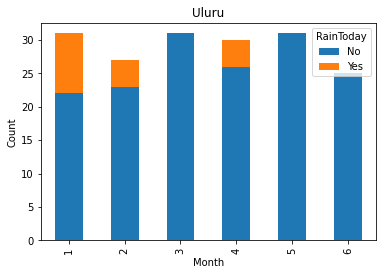

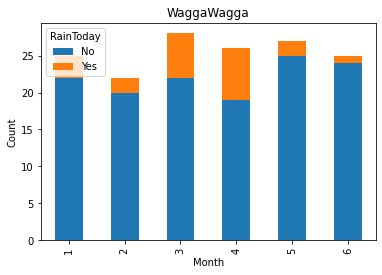

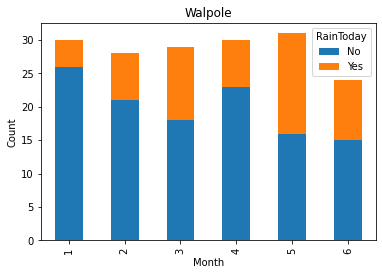

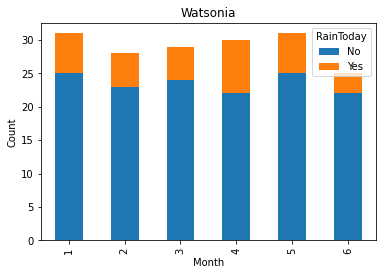

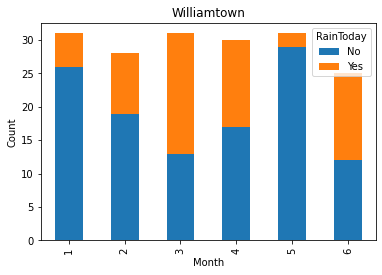

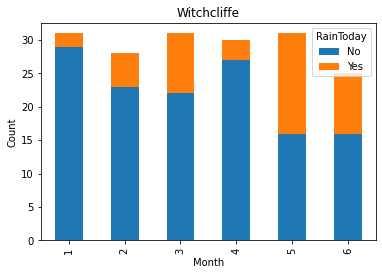

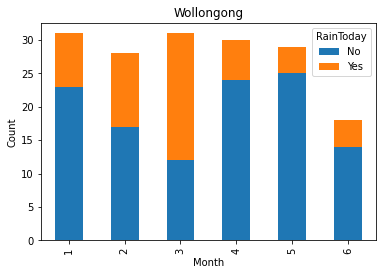

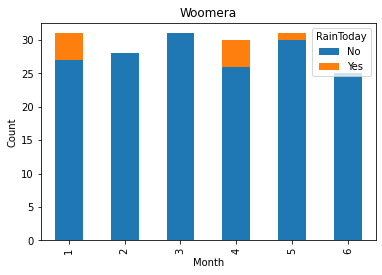

In [ ]:
#Monthly test data of year 2017

import matplotlib.pyplot as plt
data = df[df['Year'] == 2017] # filter the dataset by year
# Group the data by city
grouped_data = data.groupby('Location')

# Loop over each city and plot the graph
for name, group in grouped_data:
    # Group the data by month and RainToday, and count the number of occurrences
    grouped_month = group.groupby(['Month', 'RainToday'])['RainToday'].count().unstack()

    # Plot the graph
    ax = grouped_month.plot(kind='bar', stacked=True, title=name)
    ax.set_xlabel("Month")
    ax.set_ylabel("Count")
    plt.show()
    